<a href="https://colab.research.google.com/github/camilotayac/computational_chemistry-TC/blob/master/Colab/Graph_of_protein_structure_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧙‍♂️Graph of protein structure evaluation ♾️ Gráfica de evaluación de estructuras proteicas

🐉 **@Tyac**

🏦 **Universidad de Caldas**

🌇 **Manizales - Colombia**

In [ ]:
# @title ## 🟢  Installation of programs and import of required libraries ♾️ Instalación de programas e importación de librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from matplotlib.patches import Rectangle

In [ ]:
# @title ## 📁 Files for analysis ♾️ Archivos para el análisis
# @markdown ### **🇺🇸** - Select whether you will work with tutorial files or with your own files
# @markdown ### **🇪🇸** - Seleccione si va a trabajar con archivos del tutorial o con archivos propios
files = 'Tutorial files - Archivos del tutorial'# @param ['Tutorial files - Archivos del tutorial', 'Own files - Archivos propios']
# @markdown #### 🔴 **🇺🇸 - Note:** add the address of your folder, example: ***folder_a*** or ***folder_a/folder_b***
# @markdown #### 🔴 **🇪🇸 - Nota:** agregue la dirección de su carpeta, ejemplo: ***carpeta_a*** o ***carpeta_a/carpeta_b***
drive_folder_path = "MD" #@param {type:"string"}

if files == 'Tutorial files - Archivos del tutorial':
  %cd /content
  !git clone https://github.com/camilotayac/computational_chemistry-TC.git
  %cd computational_chemistry-TC/Examples
elif files == 'Own files - Archivos propios':
  from google.colab import drive
  drive.mount('/content/drive')
  carpeta = "/content/drive/MyDrive/" + drive_folder_path
  %cd {carpeta}

/content
Cloning into 'computational_chemistry-TC'...
remote: Enumerating objects: 205, done.
remote: Counting objects: 100% (205/205), done.
remote: Compressing objects: 100% (172/172), done.
remote: Total 205 (delta 81), reused 81 (delta 22), pack-reused 0
Receiving objects: 100% (205/205), 14.39 MiB | 16.83 MiB/s, done.
Resolving deltas: 100% (81/81), done.
/content/computational_chemistry-TC/Examples


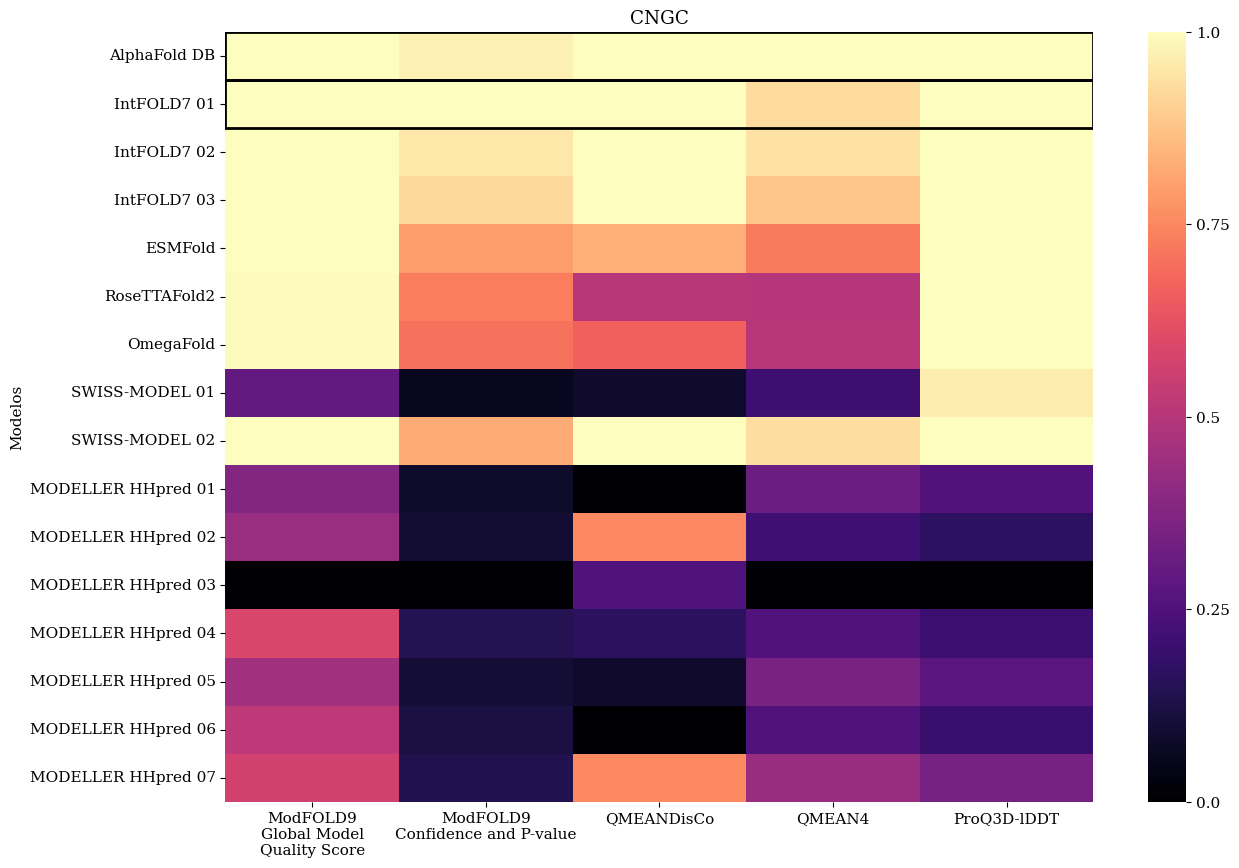

In [64]:
# @title ## 🟢 Variables for analysis ♾️ Variables para análisis

# @markdown ---

# @markdown ### **🇺🇸** - CSV file name
# @markdown ### **🇪🇸** - Nombre del archivo CSV

archivo_csv = "CNGC.csv" # @param {type:"string"}

# @markdown ---

# @markdown ### **🇺🇸** - Convert commas to dots in CSV
# @markdown ### **🇪🇸** - Convertir comas a puntos en el CSV

convertir_comas = True # @param {type:"boolean"}

# @markdown ---

# @markdown ### **🇺🇸** - Columns to invert (comma-separated, leave blank if none)
# @markdown ### **🇪🇸** - Columnas a invertir (separadas por comas, dejar en blanco si no hay ninguna)

columnas_invertir = 'ModFOLD9\nGlobal Model\nQuality Score' # @param {type:"string"}

# @markdown ---

# @markdown ### **🇺🇸** - Number of top models to highlight
# @markdown ### **🇪🇸** - Número de mejores modelos a resaltar

num_mejores_modelos = 2 # @param {type:"integer"}

# @markdown ---

# @markdown ### **🇺🇸** - Heatmap color scheme
# @markdown ### **🇪🇸** - Esquema de color para el mapa de calor

color = 'magma'  # @param ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'YlOrRd', 'YlGnBu', 'BuGn', 'PuBu', 'GnBu', 'YlGn', 'BuPu', 'RdPu', 'PuRd', 'OrRd', 'PuBuGn']

# @markdown ---

# @markdown ### **🇺🇸** - Title for the plot
# @markdown ### **🇪🇸** - Título para la gráfica

titulo = "CNGC" # @param {type:"string"}

# @markdown ---

# @markdown ### **🇺🇸** - Highlight color for best models
# @markdown ### **🇪🇸** - Color de resaltado para los mejores modelos

color_cuadro = 'black' # @param ['black', 'white', 'red', 'blue', 'green', 'cyan', 'magenta', 'yellow', 'white', '#FFB6C1', '#ADD8E6', '#98FB98', '#FFE4B5', '#FFDAB9']

# @markdown ---

# @markdown ### **🇺🇸** - Border style for highlighting
# @markdown ### **🇪🇸** - Estilo de borde para resaltar

tipo_borde = 'solid' # @param ['solid', 'dashed', 'dotted', 'dashdot']

# @markdown ---

# @markdown ### **🇺🇸** - Font type for the plot
# @markdown ### **🇪🇸** - Tipo de letra para la gráfica

tipo_fuente = 'serif' # @param ['serif', 'sans-serif', 'monospace']

# @markdown ---

# @markdown ### **🇺🇸** - Font size for the plot
# @markdown ### **🇪🇸** - Tamaño de letra para la gráfica

tamaño_fuente = 11 # @param {type:"integer"}

# @markdown ---

# @markdown ### **🇺🇸** - DPI for the output image
# @markdown ### **🇪🇸** - DPI para la imagen de salida

dpi_val = 500 # @param {type:"integer"}



df = pd.read_csv(archivo_csv, sep=",")

# Reemplazar comas por puntos y convertir a float si es necesario
if convertir_comas:
    for column in df.columns[1:]:
        df[column] = df[column].str.replace(',', '.').astype(float)

# Invertir las columnas donde un valor más pequeño es mejor si hay columnas especificadas
if columnas_invertir:
    columnas_invertir = [col.strip() for col in columnas_invertir.split(',')]
    df[columnas_invertir] = df[columnas_invertir].apply(lambda x: x * -1)

# Configurar la columna "Modelos" como índice
df = df.set_index("Modelos")

# Normalizar los datos entre 0 y 1
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

# Calcular el puntaje promedio para cada modelo
df['Mean Score'] = scaled_df.mean(axis=1)

# Determinar los mejores modelos
mejores_modelos = df.nlargest(num_mejores_modelos, 'Mean Score')

# Configurar la tipografía y estilo del gráfico
plt.rcParams.update({
    'font.family': tipo_fuente,  # Cambia la familia de fuente según la variable tipo_fuente
    'font.size': tamaño_fuente,  # Cambia el tamaño de fuente según la variable tamaño_fuente
})

# Crear el heatmap con colores personalizados para cada columna
plt.figure(figsize=(14, 10))
heatmap = sns.heatmap(scaled_df, annot=False, cmap=color, linewidths=0)

# Resaltar los cuadros de los mejores modelos con el estilo de borde especificado
for i, model in enumerate(df.index):
    if model in mejores_modelos.index:
        heatmap.add_patch(Rectangle((0, i), scaled_df.shape[1], 1, fill=False, edgecolor=color_cuadro, lw=2, linestyle=tipo_borde))

# Ajustar el título y las etiquetas
plt.title(titulo)
plt.ylabel("Modelos")

# Modificar los ticks del colorbar para mostrar más números
colorbar = heatmap.collections[0].colorbar
colorbar.set_ticks([0.0, 0.25, 0.5, 0.75, 1.0])  # Define los ticks deseados en la escala
colorbar.set_ticklabels(['0.0', '0.25', '0.5', '0.75', '1.0'])  # Define las etiquetas para cada tick

# Rotar los valores del eje x horizontalmente
plt.xticks(rotation=0)
plt.savefig(f'{titulo}.png', dpi=dpi_val, bbox_inches='tight')  # Usa la variable dpi_val para los DPI
# Mostrar la gráfica en pantalla
plt.show()
